<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-rng" data-toc-modified-id="Create-rng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create rng</a></span></li><li><span><a href="#Solving-the-System" data-toc-modified-id="Solving-the-System-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving the System</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#$\dot-Y$-Solved" data-toc-modified-id="$\dot-Y$-Solved-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>$\dot Y$ Solved</a></span></li><li><span><a href="#$i_t$-Solved" data-toc-modified-id="$i_t$-Solved-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>$i_t$ Solved</a></span></li><li><span><a href="#$\pi_t$-Solved" data-toc-modified-id="$\pi_t$-Solved-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>$\pi_t$ Solved</a></span></li></ul></li><li><span><a href="#Steady-State" data-toc-modified-id="Steady-State-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Steady State</a></span></li><li><span><a href="#Stability-Conditions" data-toc-modified-id="Stability-Conditions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stability Conditions</a></span></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simulations</a></span></li><li><span><a href="#Verify-Steady-State" data-toc-modified-id="Verify-Steady-State-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Verify Steady State</a></span></li></ul></li><li><span><a href="#State-Space-System" data-toc-modified-id="State-Space-System-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>State Space System</a></span><ul class="toc-item"><li><span><a href="#Simulations" data-toc-modified-id="Simulations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simulations</a></span></li><li><span><a href="#Impulse-Response-Function" data-toc-modified-id="Impulse-Response-Function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Impulse Response Function</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plot_defaults = {
    'figure.figsize':(14,4),
    'figure.facecolor':'white',
    'axes.grid':True,
    'grid.linewidth':0.5,
    'grid.linestyle':'--',
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False
}

plt.rcParams.update(plot_defaults)

# Create rng 

In [2]:
rng = np.random.default_rng(1337)

# Solving the System

We have:

$$\begin{align} \pi_t &= \tilde{\pi}_t + a \dot{Y} + \epsilon_{t+1} \\
                \dot Y &= b(i_t - \pi_t) \\
                i_t &= \bar i + \alpha (\pi_t - \bar \pi) + \beta \dot Y \\
                \bar i &= r + \bar \pi \\
                \tilde \pi &= \pi_{t-1} \\
                \dot Y &= \frac{Y - \bar Y}{\bar Y}\end{align}$$
                
There is only one **state variable**, $\pi_t$. State variables are those that actually move through time. The rest are call "jumpers". Once we know the state variable at time $t$, we can work out the jumpers.

We've already seen an example of state variables and jumpers, in the Samuelson Multiplier Accelerator model. 

When possible, it's best to solve down the model to just the state variables. In some cases it's impossible, and more advanced solution techniques are required. In this case, it's just an algebra grind. Let's use Sympy to help.

In [3]:
pi_t, pi_tm1, pi_bar, Y, Y_bar, Y_dot, i_t, r, e = sp.symbols(['\pi_t', r'\pi_{t-1}', r'\bar{\pi}', 'Y', r'\bar{Y}', r'\dot{Y}', 'i_t', 'r', '\epsilon_{t+1}'])
a, b, alpha, beta = sp.symbols(['a', 'b', R'\alpha', r'\beta'])

In [4]:
# Y_dot = (Y - Y_bar) / Y_bar
i_bar = r + pi_bar
i_t = i_bar + alpha * (pi_t - pi_bar) + beta * Y_dot
AS = sp.Eq(pi_t, pi_tm1 + a * Y_dot + e)
AD = sp.Eq(Y_dot, b * (i_t - pi_t))

### $\dot Y$ Solved

In [5]:
Y_dot_solved = sp.solve(AD, Y_dot)[0]
Y_dot_solved.collect([pi_bar, pi_t]).collect(1 - alpha)

b*(-r + (1 - \alpha)*(-\bar{\pi} + \pi_t))/(\beta*b - 1)

In [6]:
AS_subbed = AS.subs({Y_dot:Y_dot_solved})
AS_subbed

Eq(\pi_t, \epsilon_{t+1} + \pi_{t-1} + a*b*(\alpha*\bar{\pi} - \alpha*\pi_t - \bar{\pi} + \pi_t - r)/(\beta*b - 1))

### $i_t$ Solved

In [7]:
i_t.subs({Y_dot:Y_dot_solved}).simplify().collect([pi_t, pi_bar])

(\bar{\pi}*(\alpha - 1) + \pi_t*(-\alpha + \beta*b) - r)/(\beta*b - 1)

### $\pi_t$ Solved

In [8]:
pi_solved = sp.solve(AS_subbed, pi_t)[0]
pi_solved.collect(a * b).collect(pi_bar).collect([pi_tm1, e]).collect(beta * b - 1).simplify()

(a*b*(\bar{\pi}*(\alpha - 1) - r) + (\epsilon_{t+1} + \pi_{t-1})*(\beta*b - 1))/(\beta*b + a*b*(\alpha - 1) - 1)

## Steady State

Since we have the recursive equation in $\pi_t$, we can solve for the steady state by setting $\pi_t = \pi_{t-1} = \pi^\star$, and $\epsilon_{t+1} = 0$

In [9]:
pi_star = sp.Symbol(r'\pi^\star')
sp.Eq(pi_star, sp.solve(pi_star - pi_solved.subs({pi_tm1:pi_star, e:0}), pi_star)[0].collect(pi_bar).simplify())

Eq(\pi^\star, (\bar{\pi}*(\alpha - 1) - r)/(\alpha - 1))

## Stability Conditions

We have an AR(1) system, so we know that the coefficient on $\pi_{t-1}$ needs to be between -1 and 1. Preferably, it's between 0 and 1. In our case, the coefficient is:

$$\frac{1 - b\beta}{1 - b\beta + ab(1 - \alpha)}$$

Let's assume that all these coefficients are positive. For this to be positive, we need:

$$ \begin{align}1 &> b\beta \\
                1 + ab(1 - \alpha) &> b\beta \end{align}$$
                
Only one of these is binding, and it should be the first one, because if we assume everybody is positive, and that $\alpha < 1$. Under these assumptions, $ab(1 - \alpha) > 1$, so $(1 + ab(1-\alpha)) > 1$. Therefore, the more onerous requirement is that $b\beta < 1$. This reduces to $\beta < \frac{1}{b}$. So the central bank is not free to care about the output gap as much as it likes, it needs to choose a sensitivity that is less than the reciprocal of the marginal rate of productivity with respect to the real interest rate.

In [11]:
a = 1.2
b = 0.2
α = 0.4
β = 3

pi_bar = 1.02
i_bar = 1.1

gamma = (1 - b * β) / (1 - b * β + (1 - α) * a * b)
r = i_bar - pi_bar
pi_star = pi_bar + r / (1 - α)

In [12]:
T = 100
n_simulations = 500
pi = np.zeros((T, n_simulations))
pi[0, :] = rng.normal(size=n_simulations)
for t in range(1, T):
    epsilon = rng.normal(size=n_simulations)
    pi[t, :] = gamma * pi[t-1] + a * b * gamma / (1 - b * β) * (r + (1 - α) * pi_bar) + gamma * epsilon

## Simulations

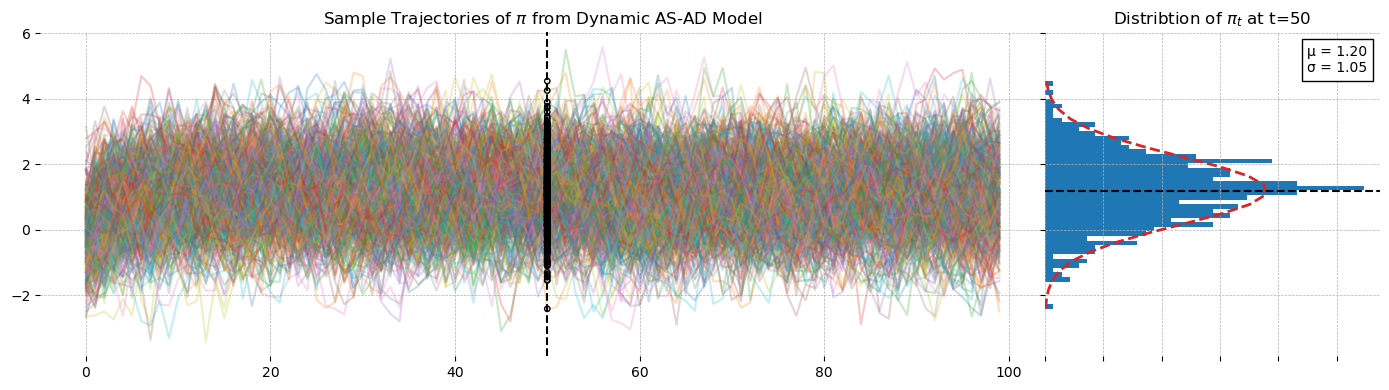

In [13]:
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
from scipy import stats

slice_time = 50
n_bins = 25

gs = GridSpec(nrows=1, ncols = 4)
fig = plt.figure()

time_axis = fig.add_subplot(gs[0, :3])
hist_axis = fig.add_subplot(gs[0, 3])

slice_data = pi[slice_time, :]

time_axis.plot(pi, alpha=0.25)
time_axis.axvline(slice_time, ls='--', color='k', zorder=1000)
time_axis.scatter(np.full(n_simulations, slice_time), slice_data, zorder=1000, facecolor='none', edgecolor='k', s=15)
time_axis.set_title('Sample Trajectories of $\pi$ from Dynamic AS-AD Model')

hist_axis.hist(slice_data, bins=50, orientation='horizontal', density=True)
mu_hat, sigma_hat = stats.norm.fit_loc_scale(slice_data)
text = f'μ = {mu_hat:0.2f}\nσ = {sigma_hat:0.2f}'
box = AnchoredText(text, loc='upper right')

x_grid = np.linspace(slice_data.min(), slice_data.max(), n_bins)
hist_axis.plot(stats.norm(loc=mu_hat, scale=sigma_hat).pdf(x_grid), x_grid, ls='--', color='tab:red', lw=2)
hist_axis.set(yticklabels = [], xticklabels = [], ylim=time_axis.get_ylim(), title=f'Distribtion of $\pi_t$ at t={slice_time}')
hist_axis.axhline(mu_hat, ls='--', c='k')
hist_axis.add_artist(box)
fig.tight_layout(w_pad=0)
plt.show()

## Verify Steady State

In [14]:
T = 1000
pi = np.zeros(T)
pi[0] = rng.normal()
for t in range(1, T):
    pi[t] =  gamma * pi[t-1] + a * b * gamma / (1 - b * β) * (r + (1 - α) * pi_bar)

In [15]:
print(f'Analytic Steady State: {pi_star:0.5}')
print(f'Simulation after {T} timesteps: {pi[-1]:0.5}')

Analytic Steady State: 1.1533
Simulation after 1000 timesteps: 1.1533


# State Space System

State transition equation:

$$x_{t+1} = Ax_t + d + R\epsilon_{t+1}$$

$$\begin{align}x_t &= \begin{bmatrix} \pi_t \end{bmatrix} \\
                 A &= \begin{bmatrix} \gamma \end{bmatrix} \\
                 d &= \begin{bmatrix} \frac{ab\gamma}{(1 - b\beta)} \left (r + (1 - \alpha) \bar \pi \right ) \end{bmatrix} \\
                 R &= \begin{bmatrix} \gamma \end{bmatrix} \\
                 \end{align}$$
                 
Observation equations:

$$y_t = Zx_t + c$$
$$\begin{align}y_t &= \begin{bmatrix} \pi_t \\ \dot Y \\ i_t \end{bmatrix} \\
                 Z &= \begin{bmatrix} 1 \\ -\frac{b(1-\alpha)}{1 - b \beta} \\
                                      \frac{b\beta - \alpha}{1 - b \beta} \end{bmatrix} \\
                 c &= \begin{bmatrix} 0 \\
                                      \frac{b}{(1 - b\beta)} \left (r + (1 - \alpha) \bar \pi \right ) \\
                                      \frac{(1 - \alpha)\bar \pi + r}{1 - b\beta} \end{bmatrix} \\
                 \end{align}$$


In [16]:
gamma = (1 - b * β) / (1 - b * β + (1 - α) * a * b)
r = i_bar - pi_bar
pi_star = pi_bar + r / (1 - α)

A = np.array([gamma])
d = np.array([a * b * gamma / (1 - b * β) *(r + (1 - α) * pi_bar)])
R = np.array([gamma])

Z = np.array([[1],
              [-b * (1 - α) / (1 - b * β)],
              [(b * β - α) / (1 - b * β)]])
c = np.array([[0],
              [b / (1 - b * β) * (r + (1 - α) * pi_bar)],
              [((1 - α) * pi_bar + r) / (1 - b * β)]])

## Simulations

In [17]:
T = 100
x = np.zeros((T, 1, 1))
y = np.zeros((T, 3, 1))
x[0] = rng.normal()

for t in range(0, T-1):
    x[t+1] = A @ x[t] + d + R @ rng.normal(size=(1,1))
    y[t] = Z @ x[t] + c
y[t+1] = Z @ x[t+1] + c

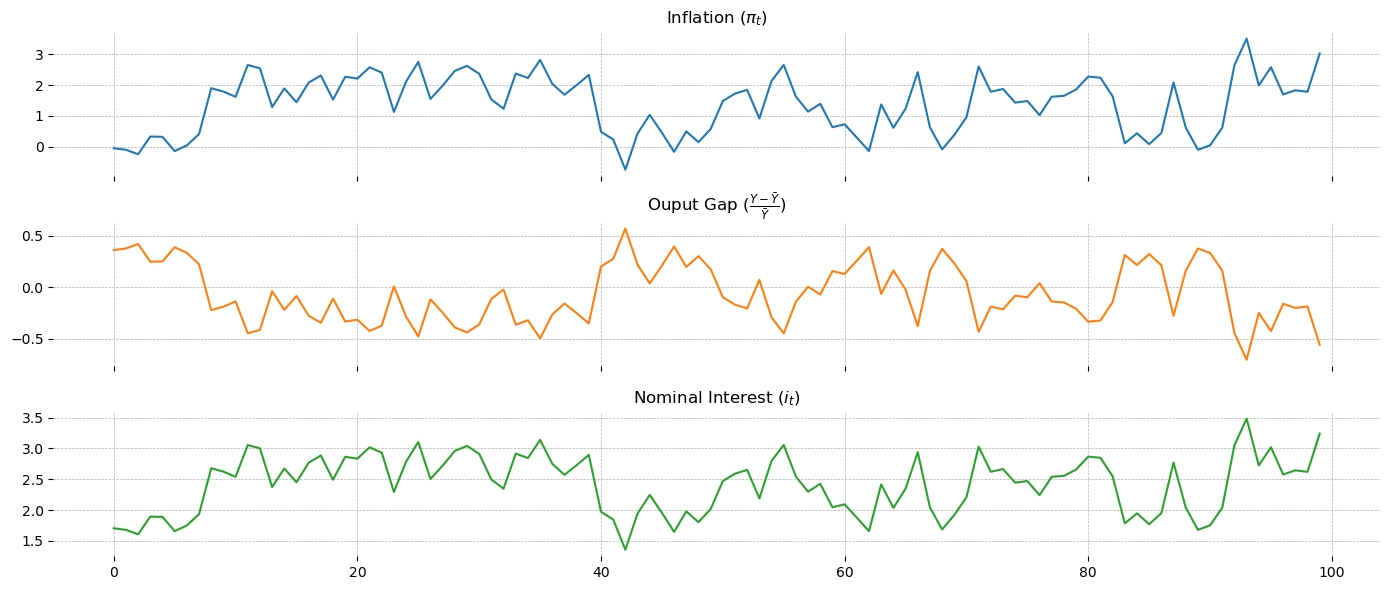

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
ax[0].plot(y[:, 0], color='tab:blue')
ax[0].set_title('Inflation ($\pi_t$)')

ax[1].plot(y[:, 1], color='tab:orange')
ax[1].set_title(r'Ouput Gap ($\frac{Y - \bar{Y}}{\bar{Y}}$)')

ax[2].plot(y[:, 2], color='tab:green')
ax[2].set_title('Nominal Interest ($i_t$)')

fig.tight_layout()
plt.show()

In [26]:
T = 100
n_simulations = 250

x = np.zeros((T, n_simulations, 1, 1))
y = np.zeros((T, n_simulations, 3, 1))
x[0] = rng.normal(scale=2, size=(n_simulations, 1, 1))

for t in range(0, T-1):
    x[t+1] = (A @ x[t] + d + R @ rng.normal(size=(n_simulations, 1, 1)))[:, None]
    y[t] = Z @ x[t] + c
y[t+1] = Z @ x[t+1] + c

y = y.squeeze()

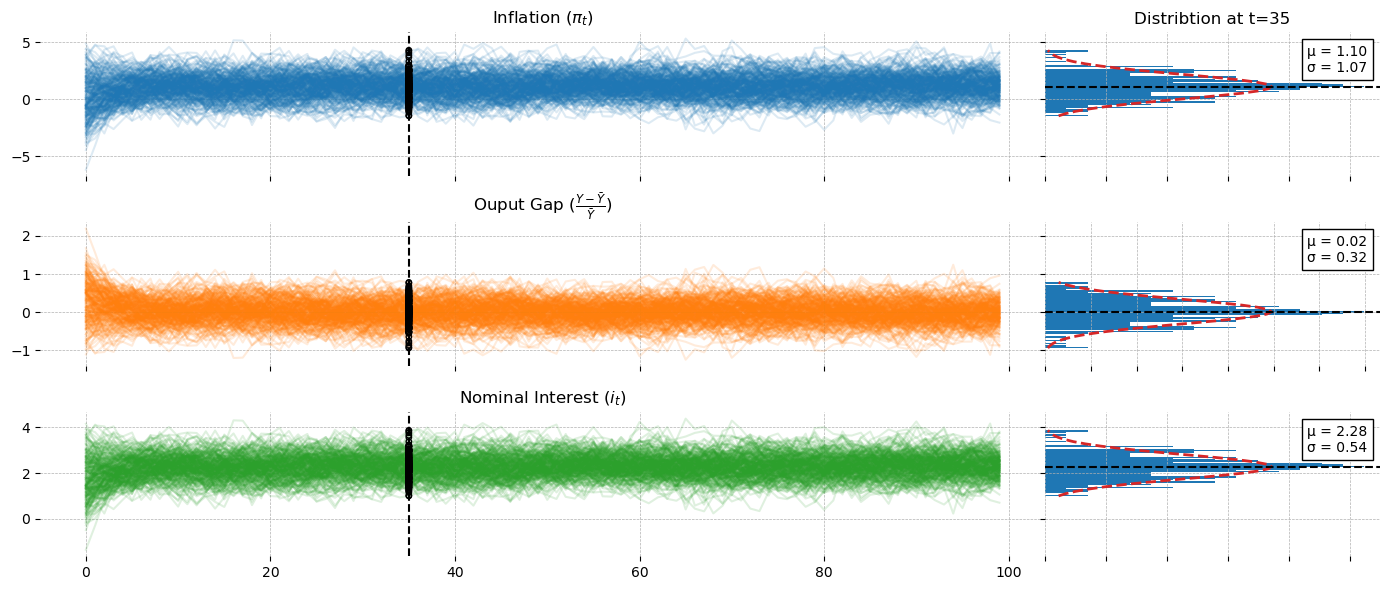

In [27]:
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(nrows=3, ncols=4)
slice_time = 35
n_bins = 30

titles = ['Inflation ($\pi_t$)', r'Ouput Gap ($\frac{Y - \bar{Y}}{\bar{Y}}$)', 'Nominal Interest ($i_t$)']
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i in range(3):
    time_axis = fig.add_subplot(gs[i, :3])
    hist_axis = fig.add_subplot(gs[i, 3])
    
    data = y[:, :, i]
    slice_data = data[slice_time, :]

    time_axis.plot(data, alpha=0.15, color=colors[i])
    time_axis.axvline(slice_time, ls='--', color='k', zorder=1000)
    time_axis.scatter(np.full(n_simulations, slice_time), slice_data, zorder=1000, facecolor='none', edgecolor='k', s=15)
    time_axis.set_title(titles[i])
    if i < 2:
        time_axis.set(xticklabels=[])

    hist_axis.hist(slice_data, bins=50, orientation='horizontal', density=True)
    mu_hat, sigma_hat = stats.norm.fit_loc_scale(slice_data)
    text = f'μ = {mu_hat:0.2f}\nσ = {sigma_hat:0.2f}'
    box = AnchoredText(text, loc='upper right')

    x_grid = np.linspace(slice_data.min(), slice_data.max(), n_bins)
    hist_axis.plot(stats.norm(loc=mu_hat, scale=sigma_hat).pdf(x_grid), x_grid, ls='--', color='tab:red', lw=2)
    hist_axis.set(yticklabels = [], xticklabels = [], ylim=time_axis.get_ylim(), title=f'Distribtion at t={slice_time}' if i ==0 else None)
    hist_axis.axhline(mu_hat, ls='--', c='k')
    hist_axis.add_artist(box)
    
fig.tight_layout(w_pad=0)
plt.show()

## Impulse Response Function

In [32]:
T = 100
x = np.zeros((T, 1, 1))
y = np.zeros((T, 3, 1))
x[0] = pi_star

shocks = np.zeros((T, 1, 1))
shocks[30] = 1

for t in range(0, T-1):
    x[t+1] = A @ x[t] + d + R @ shocks[t]
    y[t] = Z @ x[t] + c
y[t+1] = Z @ x[t+1] + c

In [36]:
y[31, 0] - pi_star

array([0.36764706])

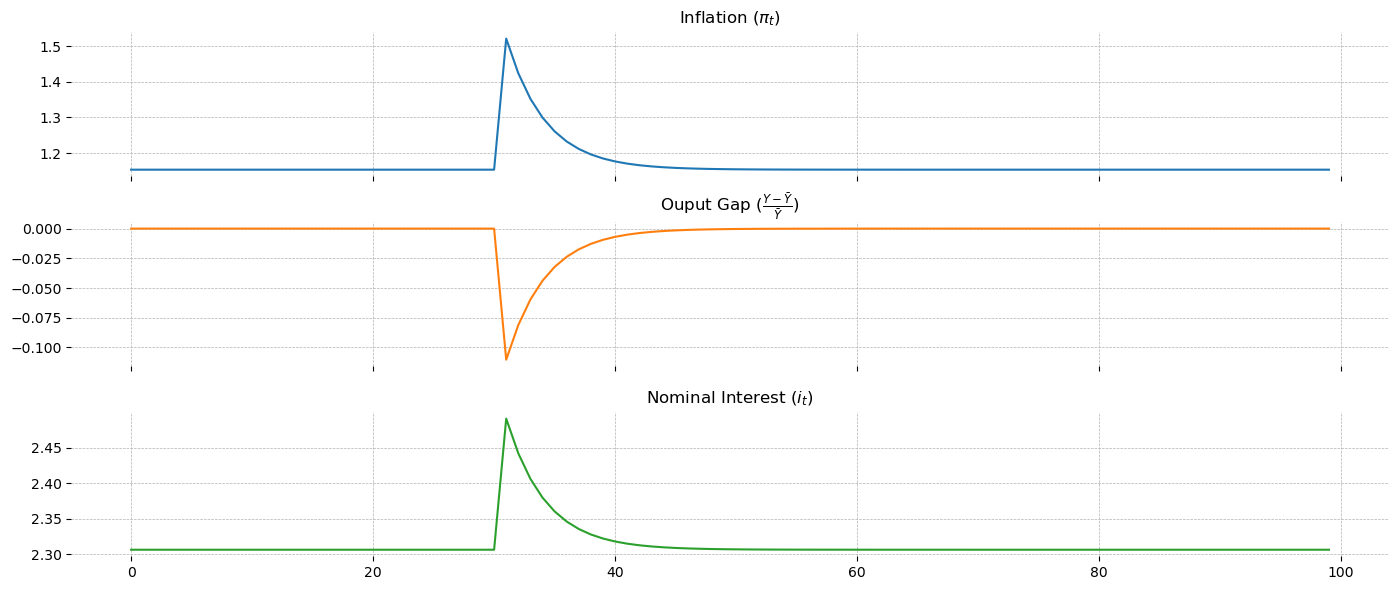

In [34]:
fig, ax = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
ax[0].plot(y[:, 0], color='tab:blue')
ax[0].set_title('Inflation ($\pi_t$)')

ax[1].plot(y[:, 1], color='tab:orange')
ax[1].set_title(r'Ouput Gap ($\frac{Y - \bar{Y}}{\bar{Y}}$)')

ax[2].plot(y[:, 2], color='tab:green')
ax[2].set_title('Nominal Interest ($i_t$)')

fig.tight_layout()
plt.show()